In [1]:
import numpy as np
import random
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
data = load_wine()
X, y = data['data'], data['target']
X.shape

(178, 13)

In [39]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [9]:
class KMeans:
    def __init__(self, n_clusters, max_iter, max_convergence_change_cnt, random_seed):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.max_convergence_change_cnt = max_convergence_change_cnt
        self.random_seed = random_seed

    def fit(self, X):
        random.seed(self.random_seed)

        n_rows = X.shape[0]
        self.grps = np.zeros(n_rows)
        # set initial clusters
        self.grps[random.sample(range(0, n_rows - 1), self.n_clusters)] = np.arange(self.n_clusters)
        self.changed_cnt_each_iteration = []

        for i in range(self.max_iter):
            # calculate centroids (use mean for now)
            self.centroids = np.array([np.mean(X[self.grps == grp], axis = 0) for grp in range(self.n_clusters)])

            # calculate and reassign to nearest cluster (use Euclidean distance for now)
            new_grps = np.array([np.argmin(np.sum((row - self.centroids)**2, axis = 1)**0.5) for row in X])
            changed_cnt = sum(new_grps != self.grps)
            self.changed_cnt_each_iteration.append(changed_cnt)
            self.grps = new_grps
            self.n_iter = i
            if changed_cnt == 0:
                break

        self.inertia_ = np.sum(np.sum((X - self.centroids[self.grps])**2, axis = 1))
        return self

    def predict(self, X):
        new_grps = np.array([np.argmin(np.sum((row - self.centroids)**2, axis = 1)**0.5) for row in X])
        return new_grps

2370689.686782968


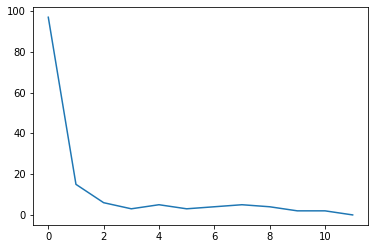

In [10]:
my_kmeans = KMeans(k, iterations, 0, 0).fit(X)
print(my_kmeans.inertia_)
plt.plot(my_kmeans.changed_cnt_each_iteration)

(array([62.,  0.,  0.,  0.,  0., 69.,  0.,  0.,  0., 47.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

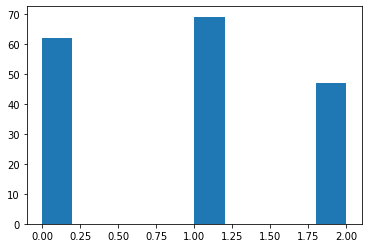

In [4]:
random.seed(0)

k = 3
iterations = 100
n_rows, n_cols = X.shape
grps = np.zeros(n_rows)
grps[random.sample(range(0, n_rows - 1), k)] = np.arange(k)
changed_cnt_each_iteration = []

for i in range(iterations):
    # calculate centroids (use mean for now)
    centroids = np.array([np.mean(X[grps == grp], axis = 0) for grp in range(k)])
    
    # calculate and reassign to nearest cluster (use Euclidean distance for now)
    new_grps = np.array([np.argmin(np.sum((row - centroids)**2, axis = 1)**0.5) for row in X])
    changed_cnt = sum(new_grps != grps)
    changed_cnt_each_iteration.append(changed_cnt)
    grps = new_grps
    n_iter = i
    if changed_cnt == 0:
        break

j = np.sum(np.sum((X - centroids[grps])**2, axis = 1))
plt.hist(grps)

In [5]:
j

2370689.686782968

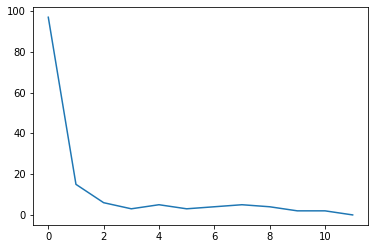

In [6]:
plt.plot(changed_cnt_each_iteration)

(array([46.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

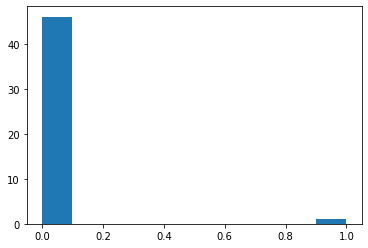

In [27]:
plt.hist(y[grps == 0])

(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 19.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

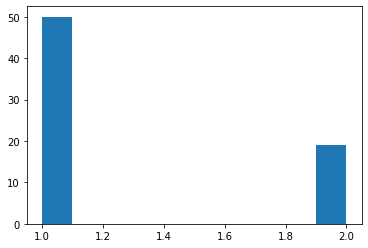

In [28]:
plt.hist(y[grps == 1])

(array([13.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0., 29.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

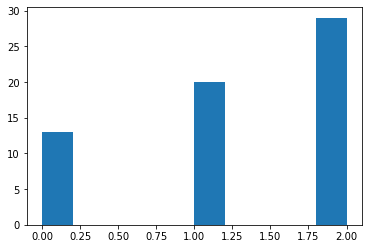

In [29]:
plt.hist(y[grps == 2])

2633555.332409339


(array([ 49.,   0.,   0.,   0.,   0., 102.,   0.,   0.,   0.,  27.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

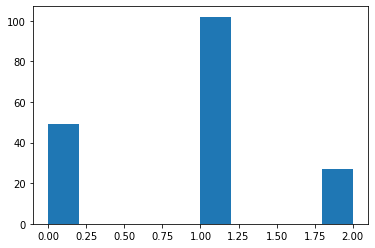

In [55]:
sklearn_kmeans = KMeans(n_clusters = k, n_init = 1, max_iter = iterations, random_state = 0).fit(X)
print(sklearn_kmeans.inertia_)
plt.hist(sklearn_kmeans.labels_)

In [54]:
sklearn_kmeans.cluster_centers_

array([[1.33691837e+01, 2.40000000e+00, 2.39265306e+00, 1.85142857e+01,
        1.09081633e+02, 2.44163265e+00, 2.21367347e+00, 3.25510204e-01,
        1.70673469e+00, 5.18836735e+00, 9.59714286e-01, 2.84795918e+00,
        9.06346939e+02],
       [1.25985294e+01, 2.45343137e+00, 2.32186275e+00, 2.06460784e+01,
        9.36960784e+01, 2.05362745e+00, 1.64754902e+00, 3.95980392e-01,
        1.42509804e+00, 4.67333332e+00, 9.17843137e-01, 2.39480392e+00,
        5.21558824e+02],
       [1.38507407e+01, 1.77851852e+00, 2.48777778e+00, 1.69259259e+01,
        1.05629630e+02, 2.94148148e+00, 3.13666667e+00, 2.98888889e-01,
        2.00703704e+00, 6.27518519e+00, 1.10296296e+00, 3.00222222e+00,
        1.30877778e+03]])

(array([31.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0., 11.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

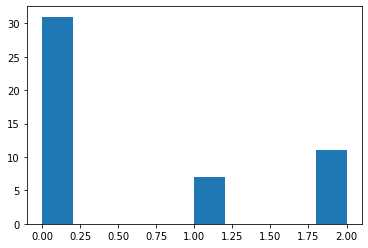

In [56]:
plt.hist(y[sklearn_kmeans.labels_ == 0])

(array([ 1.,  0.,  0.,  0.,  0., 64.,  0.,  0.,  0., 37.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

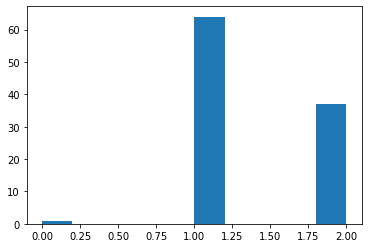

In [57]:
plt.hist(y[sklearn_kmeans.labels_ == 1])

(array([ 0.,  0.,  0.,  0.,  0., 27.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

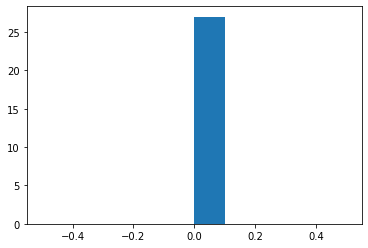

In [58]:

plt.hist(y[sklearn_kmeans.labels_ == 2])

2370689.686782968


(array([69.,  0.,  0.,  0.,  0., 47.,  0.,  0.,  0., 62.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

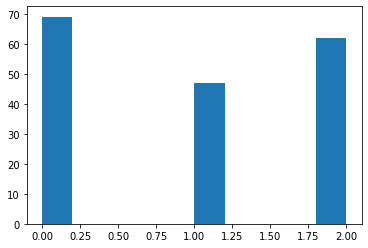

In [69]:
sklearn_kmeans = KMeans(n_clusters = k, n_init = 10, max_iter = iterations, random_state = 0).fit(X)
print(sklearn_kmeans.inertia_)
plt.hist(sklearn_kmeans.labels_)